In [88]:
from PIL import Image, ImageFont, ImageDraw, ImageOps
import requests
from datetime import datetime
import textwrap
import ranges
from io import BytesIO

In [2]:
img = Image.open("talk-image-template.png")

In [3]:
font_type = "GothamRoundedMedium_21022.ttf"

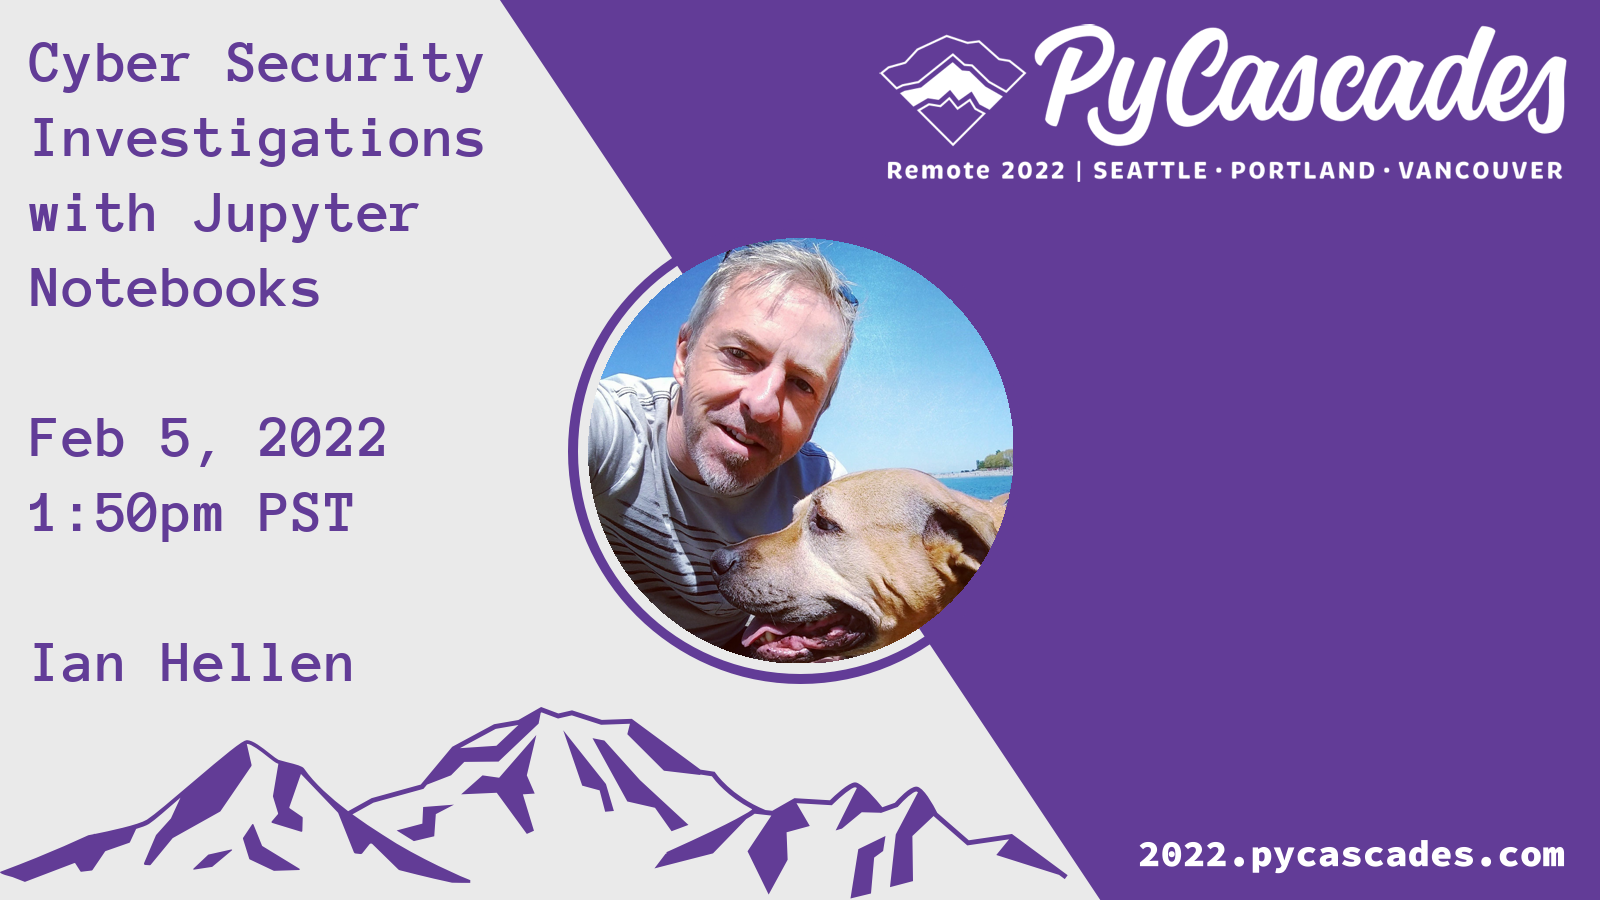

In [58]:
title_font = ImageFont.truetype("fonts/Anonymous_Pro_B.ttf", size=60)
# title_font = ImageFont.truetype("fonts/WHITRABT.TTF", size=60)
# title_font = ImageFont.truetype("fonts/WHITRABT.TTF", size=60)
# name_font = ImageFont.truetype("fonts/Anonymous_Pro_B.ttf", size=60)
name_font = ImageFont.truetype("fonts/Gravity-Italic.ttf", size=70)
date_font = ImageFont.truetype("fonts/Gravity-Italic.ttf", size=60)

template = Image.open("talk-image-template-v2.png")
pyc_red_color = (218, 55, 99)
pyc_purple_color = (98, 60, 151)
# pyc_blue_color = (19, 178, 183)
pyc_blue_color = (61, 249, 255)
# Add text
drawing = ImageDraw.Draw(template)
drawing.text(xy=(30, 30),
             text="Cyber Security \nInvestigations \nwith Jupyter \nNotebooks\n\nFeb 5, 2022\n1:50pm PST\n\nIan Hellen",
             fill=pyc_purple_color,
             font=title_font,
             spacing=24
            )
# drawing.text(
# #              xy=(1000, 275),
# #              xy=(30, 650),
#              xy=(1570, 200),
#              text="Ian Hellen",
#              fill=pyc_blue_color,
#              font=name_font,
#              spacing=24,
#              anchor="ra"
#             )
# drawing.text(
# #              xy=(1000, 275),
#              xy=(30, 640),
# #              xy=(1570, 200),
#              text="Feb 5th, 1:50pm PST",
#              fill=pyc_red_color,
#              font=date_font,
#              spacing=24,
#             )

# Add pfp
size = (425, 425)
pfp = Image.open("ian-hellen.png")
# Resize, center, and crop
# https://gist.github.com/sigilioso/2957026#gistcomment-1409714
pfpo = ImageOps.fit(pfp, size)
# Crop to a circle
# https://stackoverflow.com/a/890114/3277713
mask = Image.new("L", size, 0)
ellipse = ImageDraw.Draw(mask)
ellipse.ellipse((0, 0) + size, fill=255)
# pfpo.paste(0, mask=mask)
pfpo.putalpha(mask)
pfpo.convert('P', palette=Image.ADAPTIVE)


# Determine where to paste in the new image
y = (900 // 2) - (size[0] // 2)
x = (1600 // 2) - (size[1] // 2)
inner_box = (x, y)
# Put the profile pic in the image
template.paste(pfpo, inner_box, mask=mask)


display(template)

In [78]:
twitter_question_id = 1153

In [83]:
def get_twitter_handle(speaker):
    speaker_data = requests.get(f"https://pretalx.com/api/events/pycascades-2022/speakers/{speaker['code']}",
                                headers=headers).json()
    handle = None
    for answer in speaker_data["answers"]:
        if answer["question"]["id"] == twitter_question_id:
            handle = answer["answer"].strip("@")
            break
    return handle

In [103]:
def get_talks():
    exclude = {"MVLLML", "8YFUUC", "VVSFBR", "3C3BFP", "3HKZTJ",}
    r = requests.get("https://pretalx.com/api/events/pycascades-2022/submissions/?state=confirmed", headers=headers)
    r.raise_for_status()
    data = [talk for talk in r.json()["results"] if talk["code"] not in exclude]
    talks = []
    for blob in data:
        talktime = datetime.fromisoformat(blob["slot"]["start"]).strftime("%b %-d, %Y\n%-I:%M%p PST")
        speaker = blob["speakers"][0]
        talk = {
            "title": blob["title"],
            "name": speaker["name"],
            "time": talktime,
            "pfp": speaker["avatar"],
            "twitter": get_twitter_handle(speaker),
        }
        talks.append(talk)
    return talks

In [104]:
talks = get_talks()

In [82]:
talks

[{'title': 'Diversity in Neurodiversity: Help for Underrepresented Folks in Tech and Allies with New Mental Health Diagnoses',
  'name': 'Jay Miller',
  'time': 'Feb 6, 2022\n9:55AM UTC-08:00',
  'pfp': 'https://pretalx.com/media/avatars/Selfie_27_Sep_2021_6YnP62Z.jpg',
  'twitter': 'kjaymiller'},
 {'title': 'Invisible Walls: Isolating Your Python',
  'name': 'Jeremiah Paige',
  'time': 'Feb 5, 2022\n3:10PM UTC-08:00',
  'pfp': 'https://pretalx.com/media/avatars/FB_IMG_1479148712979_7HSytv7.jpg',
  'twitter': '@ucodery'},
 {'title': 'Building Elegant API Contracts: From Zero to Hero',
  'name': 'Neeraj Pandey',
  'time': 'Feb 5, 2022\n1:10PM UTC-08:00',
  'pfp': 'https://pretalx.com/media/avatars/profile_pic_MtDXVQ5.jpeg',
  'twitter': 'neerajp99'},
 {'title': 'Supporting the George Floyd Protests in Portland: Demonstrations, Legal Support, and Django Apps',
  'name': 'Thursday Bram',
  'time': 'Feb 5, 2022\n10:20AM UTC-08:00',
  'pfp': 'https://pretalx.com/media/avatars/thursdayb_imag

In [ ]:
def make_title(talk):
    limit = 15
    words = talk["title"].split(" ")
    final_words = []
    base_index = 0
    word_count = len(words)
    for idx in range(total_words):
        if len(final_words) == 0:
            continue
        elif idx <= word_count:
            text = " ".join(words[base_index:idx])
 
        if len(text) <= 15:
            last_index = idx - 1
            final_words.append(text)
            base_index = idx - 1
    title = "\n".join(final_words)
    return title

In [98]:
large_cutoff = ranges.Range(80, ranges.Inf)
med_cutoff = ranges.Range(40, 80)
small_cutoff = ranges.Range(0, 40)
cutoffs = ranges.RangeDict({
    large_cutoff: 24,
    med_cutoff: 19,
    small_cutoff: 15,
})

In [99]:
def make_title(talk):
    title = talk["title"]
    cutoff = cutoffs[len(title)]
    formatted = textwrap.wrap(title, width=cutoff)
    return "\n".join(formatted)
    

In [92]:
large_font = ranges.Range(0, 80)
med_font = ranges.Range(80, 120)
small_font = ranges.Range(120, ranges.Inf)
fonts = ranges.RangeDict({
    large_font: 60,
    med_font: 50,
    small_font: 40,
})

In [113]:
def make_placard(talk):
    title = make_title(talk)
    spacing = "\n\n"
    name = talk["name"]
    print(f"Working on {name}")
    if title.startswith("Fifty shades"):
        spacing = "\n\n\n"
    text = title + spacing + talk["time"] + spacing + name
    text_font = ImageFont.truetype("fonts/Anonymous_Pro_B.ttf", size=fonts[len(text)])
    template = Image.open("talk-image-template-v2.png")
    pyc_purple_color = (98, 60, 151)
    drawing = ImageDraw.Draw(template)
    drawing.text(xy=(30, 30),
                 text=text,
                 fill=pyc_purple_color,
                 font=text_font,
                 spacing=24
                )

    # Add pfp
    size = (425, 425)
    pfp_data = BytesIO(requests.get(talk["pfp"]).content)
    pfp = Image.open(pfp_data)
    # Resize, center, and crop
    # https://gist.github.com/sigilioso/2957026#gistcomment-1409714
    pfpo = ImageOps.fit(pfp, size)
    # Crop to a circle
    # https://stackoverflow.com/a/890114/3277713
    mask = Image.new("L", size, 0)
    ellipse = ImageDraw.Draw(mask)
    ellipse.ellipse((0, 0) + size, fill=255)
    # pfpo.paste(0, mask=mask)
    pfpo.putalpha(mask)
    pfpo.convert('P', palette=Image.ADAPTIVE)


    # Determine where to paste in the new image
    y = (900 // 2) - (size[0] // 2)
    x = (1600 // 2) - (size[1] // 2)
    inner_box = (x, y)
    # Put the profile pic in the image
    template.paste(pfpo, inner_box, mask=mask)
    template.save(f"outputs/{name}", "PNG")
#     display(template)

In [115]:
tweets = ""

for talk in talks:
    tweets += "========================"
    name = talk["name"]
    twitter = talk["twitter"]
    at = f"@{twitter}" if twitter else name
    title = talk["title"]
    time = talk["time"].replace("\n", " ")
    make_placard(talk)
    tweets += f"""
TWITTER: {talk["twitter"]}
TWEET:
Looking forward to {at}'s talk, {title}? Sound off in the comments!
#PyCascades

ALT:
Talk promo picture for {name}'s talk at PyCascades 2022.
The PyCascades logo is in the top right.
The URL "2022.pycascades.com" is in the bottom right.
A picture of {name} is in the center.
The top left has the talk title: "{title}".
Below that is the talk time, {time}.
Below that is {name}'s name.

"""

with open("outputs/tweets.txt", "w") as file:
    file.write(tweets)

Working on Jay Miller
Working on Jeremiah Paige
Working on Neeraj Pandey
Working on Thursday Bram
Working on Rodrigo Girão Serrão
Working on Pradhvan Bisht
Working on Moshe Zadka
Working on Isaac Na
Working on Jamey Sharp
Working on Gajendra Deshpande
Working on Joseph Riddle
Working on Tadeh Hakopian
Working on Ian Hellen
Working on Vivek Raja P S
